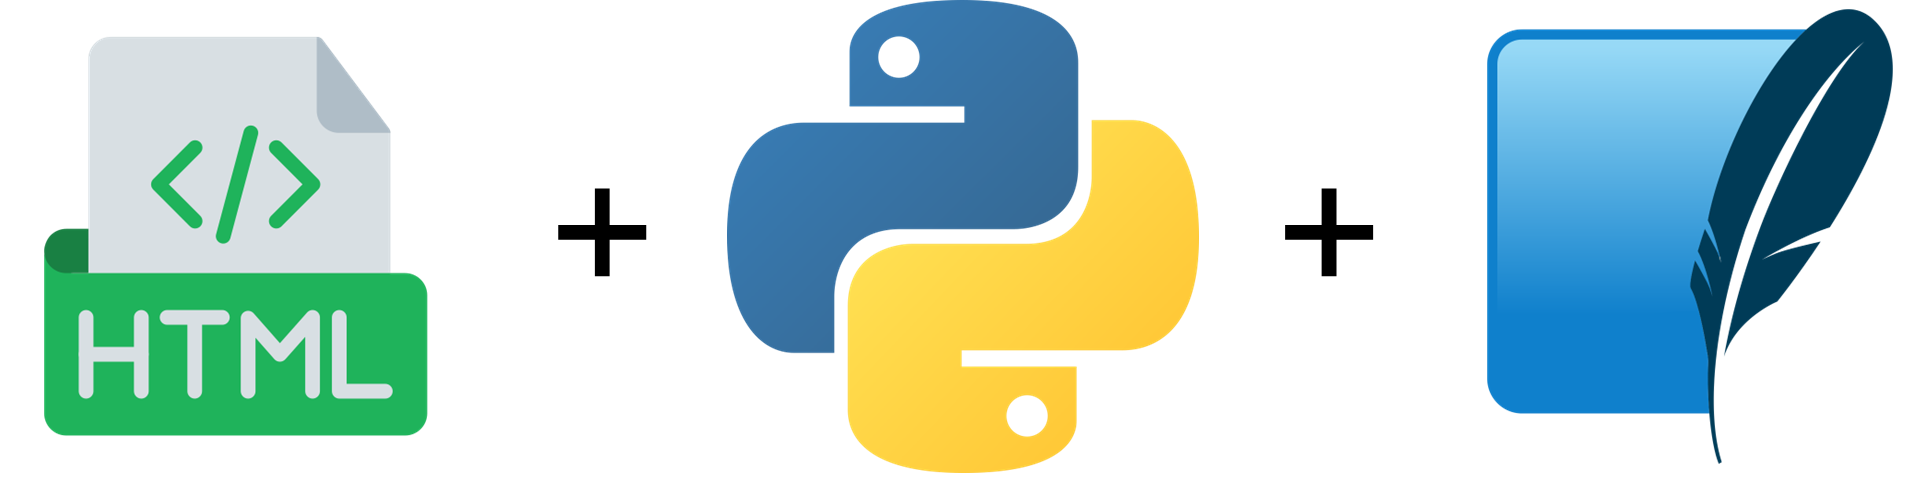

#### Passo 1: Instalar bibliotecas

In [1]:
# !pip install requests
#!pip install beautifulsoup4
#!pip install sqlite3 
#!pip install pandas

In [2]:
# !pip install parser.html
# !pip install parser
# !pip install lxml

#### Passo 2: Importar bibliotecas

In [2]:
import requests
from bs4 import BeautifulSoup
import sqlite3
import pandas as pd

#### Passo 3: Fromatar link de busca

Neste exemplo utilizaremos um site público de testes de scraping

http://books.toscrape.com (feito exatamente para treinar scraping).

In [3]:
# URL base
url = 'https://books.toscrape.com/catalogue/category/books_1/page-1.html'

#### Passo 4: Determinar variáveis que para armazenamento
Neste exemplo, iremos utilizar:
- Título
- Preços
- Estoque

In [4]:
titulo, preco, estoque = [],[],[]

#### Passo 5: Obter informações do link

In [5]:
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

#### Passo 5.1: Obter informações dos produtos

In [6]:
livros = soup.find_all( class_ = 'product_pod')

In [7]:
livros[0].h3.a['title']

'A Light in the Attic'

In [8]:
livros[0].find('p', class_ = 'price_color').text.replace('Â£','£')

'£51.77'

In [9]:
livros[0].find('p', class_ = 'instock availability').text.strip()
#a função strip() em python serve para remover espaços em branco ou caracteres específicos
# do inicio e/ou fim de uma string

'In stock'

#### Passo 6: Coletar dados em escala
Neste exemplo, vamos coletar dados das 5 primeiras páginas

In [10]:
for page in range(1,5):
    response = requests.get(f'https://books.toscrape.com/catalogue/category/books_1/page-{page}.html')
    soup = BeautifulSoup(response.text, 'html.parser')

    # Cada livro esta dentro do article product_pod
    livros = soup.find_all('article', class_ = 'product_pod')

    for i in livros:
        # Titulos
        titulo_info = i.h3.a['title']
        titulo.append(titulo_info)

        # Preço
        preco_info = i.find('p', class_='price_color').text.replace('Â£','')
        preco.append(preco_info)

        # estoque
        estoque_info = i.find('p', class_= 'instock availability').text.strip()
        estoque.append(estoque_info)

print('colete concluida')

colete concluida


#### Passo 7: Criar DataFrame

In [11]:
df = pd.DataFrame({'titulo': titulo, 'preco': preco, 'estoque': estoque})
df.head()

,titulo,preco,estoque
0,A Light in the Attic,51.77,In stock
1,Tipping the Velvet,53.74,In stock
2,Soumission,50.10,In stock
3,Sharp Objects,47.82,In stock
4,Sapiens: A Brief History of Humankind,54.23,In stock


#### Passo 8: Criar Banco de Dados

In [12]:
conn = sqlite3.connect('livros.db')
cursor = conn.cursor()

#### Passo 9: DDL – Data Definition Language
DDL serve para **definir a estrutura do banco de dados**: criar, alterar e excluir tabelas.

- `CREATE` → cria tabelas e estruturas  
- `ALTER` → modifica a estrutura de tabelas  
- `DROP` → apaga tabelas ou bancos de dados  


In [13]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS livros (
    id INTEGER PRIMARY KEY AUTOINCREMENT, 
    titulo TEXT NOT NULL, 
    preco REAL NOT NULL,
    estoque TEXT NOT NULL
);
''')

print('Tabela livros criada')

Tabela livros criada


##### 9.1: Listar todas tabelas do banco
Neste exemplo iremos utilizaremos a sintaxe `SELECT name FROM sqlite_master;`

- `sqlite_master` é uma tabela especial **interna** do SQLite que guarda **metadados** sobre o banco de dados: tabelas, índices, views e triggers
- `SELECT name` seleciona apenas o nome (`name`) dos objetos armazenados no `sqlite_master`

In [14]:
cursor.execute('SELECT name FROM sqlite_master;')
print(cursor.fetchall())

[('livros',), ('sqlite_sequence',)]


Como pegar os resultados usando o método `fetch` (buscar)
- `fetchone()` Retorna apenas uma linha do resultado (a próxima disponível). Se não houver mais nada, retorna `None`
- `fetchmany(n)` Retorna as próximas n linhas do resultado.
- `fetchall()` Retorna todas as linhas restantes do resultado em uma lista de tuplas.

##### 9.2: Verificar o esquema da tabela (estrutura das colunas)

In [15]:
cursor.execute('PRAGMA table_info(livros);')
for row in cursor.fetchall():
    print(row)

(0, 'id', 'INTEGER', 0, None, 1)
(1, 'titulo', 'TEXT', 1, None, 0)
(2, 'preco', 'REAL', 1, None, 0)
(3, 'estoque', 'TEXT', 1, None, 0)


##### 9.3: Alterar tabela
Nesta etapa utilizaremos o comando `ALTER TABLE` informar a alteração da tabela e o comando `ADD COLUMN` para especificar a alteração

In [16]:
cursor.execute('ALTER TABLE livros ADD COLUMN categoria TEXT;')
conn.commit()
print('coluna categoria adicionada à tabela livros')


coluna categoria adicionada à tabela livros


##### 9.4: Verifica o esquema da tabela após incluir coluna coluna

In [17]:
cursor.execute('PRAGMA table_info(livros);')
cursor.fetchall()

[(0, 'id', 'INTEGER', 0, None, 1),
 (1, 'titulo', 'TEXT', 1, None, 0),
 (2, 'preco', 'REAL', 1, None, 0),
 (3, 'estoque', 'TEXT', 1, None, 0),
 (4, 'categoria', 'TEXT', 0, None, 0)]

##### 9.5: Remover uma coluna 
Nesta etapa utilizaremos o comando `ALTER TABLE` informar a alteração da tabela e o comando `DROP COLUMN` para especificar a alteração

In [18]:
cursor.execute('ALTER TABLE livros DROP  COLUMN categoria;')
conn.commit()
print('remoção feita com sucesso')

remoção feita com sucesso


##### 9.6: Verifica o equema da tabela após incluir coluna coluna

In [19]:
cursor.execute('PRAGMA table_info(livros);')
cursor.fetchall()

[(0, 'id', 'INTEGER', 0, None, 1),
 (1, 'titulo', 'TEXT', 1, None, 0),
 (2, 'preco', 'REAL', 1, None, 0),
 (3, 'estoque', 'TEXT', 1, None, 0)]

##### 9.7: Excluir tabela
Primeiro vamos criar uma tabela adicional

In [20]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS produtos (
    id INTEGER PRIMARY KEY AUTOINCREMENT, 
    titulo TEXT NOT NULL, 
    preco REAL NOT NULL,
    estoque TEXT NOT NULL
);
''')
        # produtos
print('Tabela produtos criada')

Tabela produtos criada


##### Listar todas tabelas do banco

In [21]:
cursor.execute('SELECT name FROM sqlite_master;')
print(cursor.fetchall())

[('livros',), ('sqlite_sequence',), ('produtos',)]


##### Remover tabela do banco

In [22]:
cursor.execute('DROP TABLE IF EXISTS produtos')
conn.commit()
print('tabela excluida com sucesso')

tabela excluida com sucesso


##### Listar todas tabelas do banco

In [23]:
cursor.execute('SELECT name FROM sqlite_master;')
print(cursor.fetchall())

[('livros',), ('sqlite_sequence',)]


#### Passo 10: DML – Data Manipulation Language

DML serve para **manipular os dados** dentro das tabelas:

- `INSERT` → inserir registros  
- `UPDATE` → atualizar registros  
- `DELETE` → excluir registros



##### 10.1 `INSERT` (inserir dados)

In [24]:
for _, row in df.iterrows():
    cursor.execute('INSERT INTO livros (titulo, preco, estoque) VALUES (?,?,?)',
                  (row['titulo'], row['preco'], row['estoque']))

conn.commit()
print('Dados armazenados no banco')

Dados armazenados no banco


##### Verifica quantos registros foram inseridos

In [25]:
cursor.execute('SELECT COUNT(*) FROM livros;')
cursor.fetchone()

(80,)

##### Verifica uma amostra dos registros inseridos

In [26]:
cursor.execute('SELECT * FROM livros')
cursor.fetchmany(5)

[(1, 'A Light in the Attic', 51.77, 'In stock'),
 (2, 'Tipping the Velvet', 53.74, 'In stock'),
 (3, 'Soumission', 50.1, 'In stock'),
 (4, 'Sharp Objects', 47.82, 'In stock'),
 (5, 'Sapiens: A Brief History of Humankind', 54.23, 'In stock')]

##### 10.2: `UPDATE` (atualizar dados)

In [27]:
cursor.execute('UPDATE livros SET preco = 49.90 WHERE titulo = "A Light in the Attic";')
conn.commit()
print('valor atualizado')

valor atualizado


##### Verifica uma amostra dos registros inseridos

In [28]:
cursor.execute('SELECT * FROM livros')
cursor.fetchmany(5)

[(1, 'A Light in the Attic', 49.9, 'In stock'),
 (2, 'Tipping the Velvet', 53.74, 'In stock'),
 (3, 'Soumission', 50.1, 'In stock'),
 (4, 'Sharp Objects', 47.82, 'In stock'),
 (5, 'Sapiens: A Brief History of Humankind', 54.23, 'In stock')]

##### 10.3: Inserir um novo registro no banco

In [29]:
cursor.execute('INSERT INTO livros (titulo, preco, estoque) VALUES ("Python for BigData", 99.00, "Out of Stock");')
cursor.execute('INSERT INTO livros (titulo, preco, estoque) VALUES ("Python for Data Science", 99.00, "Out of Stock");')
cursor.execute('INSERT INTO livros (titulo, preco, estoque) VALUES ("Python for Data Analytics", 99.00, "Out of Stock");')
cursor.execute('INSERT INTO livros (titulo, preco, estoque) VALUES ("Python for Artificial Intelligence", 99.00, "Out of Stock");')
cursor.execute('INSERT INTO livros (titulo, preco, estoque) VALUES ("Python for Beginners", 99.00, "Out of Stock");')

print('Registro(s) inseridos com sucesso')

Registro(s) inseridos com sucesso


##### Verifica quantos registros existem no banco

In [30]:
cursor.execute('SELECT COUNT(*) FROM livros;')
cursor.fetchone()

(85,)

##### Verifica uma amostra dos últimos registros inseridos

In [31]:
cursor.execute('SELECT * FROM livros ORDER BY id DESC')
cursor.fetchmany(5)

[(85, 'Python for Beginners', 99.0, 'Out of Stock'),
 (84, 'Python for Artificial Intelligence', 99.0, 'Out of Stock'),
 (83, 'Python for Data Analytics', 99.0, 'Out of Stock'),
 (82, 'Python for Data Science', 99.0, 'Out of Stock'),
 (81, 'Python for BigData', 99.0, 'Out of Stock')]

##### 10.4: `DELETE` (exclui registros)

In [32]:
cursor.execute('DELETE FROM livros WHERE titulo = "Python for BigData"')
conn.commit()
print('registro removido')

registro removido


##### Verifica uma amostra dos últimos registros inseridos

In [33]:
cursor.execute('SELECT * FROM livros ORDER BY id DESC')
cursor.fetchmany(5)

[(85, 'Python for Beginners', 99.0, 'Out of Stock'),
 (84, 'Python for Artificial Intelligence', 99.0, 'Out of Stock'),
 (83, 'Python for Data Analytics', 99.0, 'Out of Stock'),
 (82, 'Python for Data Science', 99.0, 'Out of Stock'),
 (80,
  'Rat Queens, Vol. 3: Demons (Rat Queens (Collected Editions) #11-15)',
  50.4,
  'In stock')]

#### Passo 11: DQL serve para **consultar dados** no banco:

- `SELECT`  
- `WHERE`  
- `ORDER BY`  
- `GROUP BY`  
- Funções de agregação (`COUNT`, `AVG`, `MAX`, `MIN`, `SUM`) 

##### Consulta simples com `fetchone`

In [34]:
cursor.execute('SELECT * FROM livros ORDER BY id DESC')
cursor.fetchone()

(85, 'Python for Beginners', 99.0, 'Out of Stock')

##### Consulta simples com `fetchmany()`

In [35]:
cursor.execute('SELECT * FROM livros ORDER BY id DESC')
cursor.fetchmany(5)

[(85, 'Python for Beginners', 99.0, 'Out of Stock'),
 (84, 'Python for Artificial Intelligence', 99.0, 'Out of Stock'),
 (83, 'Python for Data Analytics', 99.0, 'Out of Stock'),
 (82, 'Python for Data Science', 99.0, 'Out of Stock'),
 (80,
  'Rat Queens, Vol. 3: Demons (Rat Queens (Collected Editions) #11-15)',
  50.4,
  'In stock')]

##### Consulta simples com `fetchall()`

In [36]:
cursor.execute('SELECT * FROM livros ORDER BY id DESC')
cursor.fetchall()

[(85, 'Python for Beginners', 99.0, 'Out of Stock'),
 (84, 'Python for Artificial Intelligence', 99.0, 'Out of Stock'),
 (83, 'Python for Data Analytics', 99.0, 'Out of Stock'),
 (82, 'Python for Data Science', 99.0, 'Out of Stock'),
 (80,
  'Rat Queens, Vol. 3: Demons (Rat Queens (Collected Editions) #11-15)',
  50.4,
  'In stock'),
 (79,
  'Reskilling America: Learning to Labor in the Twenty-First Century',
  19.83,
  'In stock'),
 (78, 'Saga, Volume 5 (Saga (Collected Editions) #5)', 51.04, 'In stock'),
 (77, 'Saga, Volume 6 (Saga (Collected Editions) #6)', 25.02, 'In stock'),
 (76, 'Security', 39.25, 'In stock'),
 (75, 'Soul Reader', 39.58, 'In stock'),
 (74,
  'Spark Joy: An Illustrated Master Class on the Art of Organizing and Tidying Up',
  41.83,
  'In stock'),
 (73,
  "The Activist's Tao Te Ching: Ancient Advice for a Modern Revolution",
  32.24,
  'In stock'),
 (72,
  'The Age of Genius: The Seventeenth Century and the Birth of the Modern Mind',
  19.73,
  'In stock'),
 (71, 

#### `WHERE`
##### Consulta com filtro: Livros com preço abaixo de 20 

In [37]:
cursor.execute('SELECT titulo, preco FROM livros WHERE preco < 20;')
cursor.fetchall()

[('The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  17.93),
 ('Starving Hearts (Triangular Trade Trilogy, #1)', 13.99),
 ('Set Me Free', 17.46),
 ('In Her Wake', 12.84),
 ('The Four Agreements: A Practical Guide to Personal Freedom', 17.66),
 ("Sophie's World", 15.94),
 ('Maude (1883-1993):She Grew Up with the country', 18.02),
 ('In a Dark, Dark Wood', 19.63),
 ('Untitled Collection: Sabbath Poems 2014', 14.27),
 ('Unicorn Tracks', 18.78),
 ('Tsubasa: WoRLD CHRoNiCLE 2 (Tsubasa WoRLD CHRoNiCLE #2)', 16.28),
 ('This One Summer', 19.49),
 ('Thirst', 17.27),
 ('The Torch Is Passed: A Harding Family Story', 19.09),
 ('The Life-Changing Magic of Tidying Up: The Japanese Art of Decluttering and Organizing',
  16.77),
 ('The Age of Genius: The Seventeenth Century and the Birth of the Modern Mind',
  19.73),
 ('Reskilling America: Learning to Labor in the Twenty-First Century', 19.83)]

#### `ORDER BY`
##### Consulta com ordenação: Top 5 livros mais caros 

In [38]:
cursor.execute('SELECT titulo, preco FROM livros ORDER BY preco DESC LIMIT 5;')
cursor.fetchall()

[('Python for Data Science', 99.0),
 ('Python for Data Analytics', 99.0),
 ('Python for Artificial Intelligence', 99.0),
 ('Python for Beginners', 99.0),
 ('The Death of Humanity: and the Case for Life', 58.11)]

#### `GROUP BY`
##### Consulta com agregação: Quantidade de livros por situação de estoque 

In [39]:
cursor.execute('SELECT estoque, COUNT(*) FROM livros GROUP BY estoque;')
cursor.fetchall()

[('In stock', 80), ('Out of Stock', 4)]

#### `DISTINCT`
##### Consulta com filtro: Contagem de dados distintos

In [41]:
cursor.execute('SELECT COUNT(DISTINCT preco) FROM livros')
cursor.fetchall()

[(80,)]

#### `HAVING COUNT(*)`
##### Consulta com filtro: Contagem de dados repetidos

In [42]:
cursor.execute('SELECT preco FROM livros GROUP BY preco HAVING COUNT(*) > 1')
cursor.fetchall()

[(44.18,), (99.0,)]

#### `AVG`
##### Consulta com agregação: Valor médio dos livros 

In [43]:
cursor.execute('SELECT AVG(preco) FROM livros')
cursor.fetchone()

(38.7,)

##### Consulta com agregação: Valor médio dos livros  (com arredondamento)

In [44]:
cursor.execute('SELECT ROUND(AVG(preco), 2) FROM livros')
cursor.fetchone()

# nesse caso nao muda pq ja ta em 2 casas decimais ou menos 

(38.7,)

#### `MAX`
##### Consulta com agregação: Maior valor entre os livros `MAX`

In [45]:
cursor.execute('SELECT MAX(preco) FROM livros')
cursor.fetchone()

(99.0,)

#### `MIN`
##### Consulta com agregação: Menor valor entre os livros 

In [46]:
cursor.execute('SELECT MIN(preco) FROM livros')
cursor.fetchone()

(12.84,)

#### `SUM`
##### Consulta com agregação: Soma do valor dos livros

In [47]:
cursor.execute('SELECT SUM(preco) FROM livros')
cursor.fetchone()

(3250.8,)

##### Consulta com agregação: Soma do valor dos livros em estoque

In [48]:
cursor.execute('SELECT SUM(preco) FROM livros WHERE estoque = "in stock"')
cursor.fetchone()[0]

##### Consulta com agregação: Soma do valor dos livros sem estoque

In [49]:
cursor.execute('SELECT SUM(preco) FROM livros WHERE estoque = "Out of stock"')
cursor.fetchone()[0]

##### Consulta de multiplos valores: Valor Máximo, Medio e Mínimo

In [50]:
cursor.execute('SELECT MAX(preco), ROUND(AVG(preco)), MIN(preco) FROM livros;')
maximo, medio, minimo = cursor.fetchone()
print(f'Preço máximo: {maximo}')
print(f'Preço máximo: {medio}')
print(f'Preço máximo: {minimo}')

Preço máximo: 99.0
Preço máximo: 39.0
Preço máximo: 12.84


##### Consulta com Ranking por Preço

In [51]:
cursor.execute('SELECT RANK() OVER (ORDER BY preco DESC) as ranking, preco, titulo FROM livros')
# cursor.fetchall()
pd.DataFrame(cursor.fetchall(), columns = ['Ranking', 'Preco', 'Titulo'])

,Ranking,Preco,Titulo
0,1,99.00,Python for Data Science
1,1,99.00,Python for Data Analytics
2,1,99.00,Python for Artificial Intelligence
3,1,99.00,Python for Beginners
4,5,58.11,The Death of Humanity: and the Case for Life
...,...,...,...
79,80,16.28,Tsubasa: WoRLD CHRoNiCLE 2 (Tsubasa WoRLD CHRo...
80,81,15.94,Sophie's World
81,82,14.27,Untitled Collection: Sabbath Poems 2014
82,83,13.99,"Starving Hearts (Triangular Trade Trilogy, #1)"


#### 12: JOINS – Relacionando tabelas

JOINS permitem **combinar dados de várias tabelas**.  
Vamos criar outras tabelas para exemplificar.

##### 12.1 Criar tabela de vendas

In [52]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS vendas(
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    livro_id INTEGER,
    data_venda DATE,
    quantidade INTEGER,
    valor_total REAL, 
    cliente TEXT,
    FOREIGN KEY (livro_id) REFERENCES livros(id)
);
''')

##### Verifica o esquema da tabela (estrutura das colunas)

In [53]:
cursor.execute('PRAGMA table_info(vendas)')
cursor.fetchall()

[(0, 'id', 'INTEGER', 0, None, 1),
 (1, 'livro_id', 'INTEGER', 0, None, 0),
 (2, 'data_venda', 'DATE', 0, None, 0),
 (3, 'quantidade', 'INTEGER', 0, None, 0),
 (4, 'valor_total', 'REAL', 0, None, 0),
 (5, 'cliente', 'TEXT', 0, None, 0)]

##### 12.2: Inserir dados de exemplo

In [54]:
vendas_exemplo = [
    (1, '2025-01-15', 2, 'Rodrigo'),
    (5, '2025-01-15', 1, 'William'),
    (10, '2025-01-15', 3, 'Walter'),
    (15, '2025-01-15', 4, 'Renato'),
    (20, '2025-01-15', 1, 'Marcela')
]

for livro_id, data, quantidade, cliente in vendas_exemplo:
    # buscar preço
    cursor.execute('SELECT preco FROM livros WHERE id = ?', (livro_id,))
    resultado = cursor.fetchone()
    valor_total = round(resultado[0]*quantidade, 2)

    cursor.execute('''
        INSERT INTO vendas (livro_id, data_venda, quantidade, valor_total, cliente)
        VALUES (?,?,?,?,?)
        ''',(livro_id, data, quantidade, valor_total, cliente))
conn.commit()
print(f'{len(vendas_exemplo)} vendas inseridas no banco')

5 vendas inseridas no banco


##### Verifica dados inseridos 

In [55]:
cursor.execute('SELECT * FROM vendas;')
cursor.fetchall()

[(1, 1, '2025-01-15', 2, 99.8, 'Rodrigo'),
 (2, 5, '2025-01-15', 1, 54.23, 'William'),
 (3, 10, '2025-01-15', 3, 156.45, 'Walter'),
 (4, 15, '2025-01-15', 4, 140.08, 'Renato'),
 (5, 20, '2025-01-15', 1, 45.17, 'Marcela')]

##### 12.3: Exemplos de JOINs com a tabela existente

In [58]:
cursor.execute("""
SELECT livros.titulo, livros.preco, vendas.quantidade, vendas.valor_total, vendas.data_venda
FROM livros
INNER JOIn vendas ON livros.rowid = vendas.livro_id
ORDER BY vendas.valor_total DESC;
""")

# cursor.fetchall()

for row in cursor.fetchall():
    print(f'Titulo: {row[0]}')
    print(f'Preço: {row[1]}')
    print(f'Venda: {row[2]} unid - R$ {row[3]}')
    print(f'Titulo: {row[4]}')

Titulo: The Black Maria
Preço: 52.15
Venda: 3 unid - R$ 156.45
Titulo: 2025-01-15
Titulo: Rip it Up and Start Again
Preço: 35.02
Venda: 4 unid - R$ 140.08
Titulo: 2025-01-15
Titulo: A Light in the Attic
Preço: 49.9
Venda: 2 unid - R$ 99.8
Titulo: 2025-01-15
Titulo: Sapiens: A Brief History of Humankind
Preço: 54.23
Venda: 1 unid - R$ 54.23
Titulo: 2025-01-15
Titulo: It's Only the Himalayas
Preço: 45.17
Venda: 1 unid - R$ 45.17
Titulo: 2025-01-15


In [59]:
cursor.execute('''
SELECT
    livros.titulo,
    livros.preco,
    livros.estoque,
    COALESCE(vendas.quantidade, 0) as quantidade_vendida,
    COALESCE(vendas.quantidade, 0) as total_vendido
FROM livros
LEFT JOIN vendas ON livros.rowid = vendas.livro_id
ORDER BY total_vendido DESC;
''')

for i in cursor.fetchall():
    # status_venda = "Vendido" if row[3] > 0 else "Não vendido"
    # print(f'Titulo: {i[0]:<40} | R$ {row[1]} | R$ {row[2]} | {status_venda}')
    print(f'Título: {i[0]:<40} | R$ {i[1]:<8} | {i[2]:<8} | Qtde: {i[3]} | Data: {i[4]}')

Título: Rip it Up and Start Again                | R$ 35.02    | In stock | Qtde: 4 | Data: 4
Título: The Black Maria                          | R$ 52.15    | In stock | Qtde: 3 | Data: 3
Título: A Light in the Attic                     | R$ 49.9     | In stock | Qtde: 2 | Data: 2
Título: Sapiens: A Brief History of Humankind    | R$ 54.23    | In stock | Qtde: 1 | Data: 1
Título: It's Only the Himalayas                  | R$ 45.17    | In stock | Qtde: 1 | Data: 1
Título: Tipping the Velvet                       | R$ 53.74    | In stock | Qtde: 0 | Data: 0
Título: Soumission                               | R$ 50.1     | In stock | Qtde: 0 | Data: 0
Título: Sharp Objects                            | R$ 47.82    | In stock | Qtde: 0 | Data: 0
Título: The Requiem Red                          | R$ 22.65    | In stock | Qtde: 0 | Data: 0
Título: The Dirty Little Secrets of Getting Your Dream Job | R$ 33.34    | In stock | Qtde: 0 | Data: 0
Título: The Coming Woman: A Novel Based on the Lif

In [65]:
cursor.execute('''
    SELECT
        livros.titulo,
        livros.preco,
        COUNT(vendas.id) as total_vendas,
        SUM(vendas.quantidade) as total_unidades,
        SUM(vendas.valor_total) as valor_total
    FROM livros
    LEFT JOIN vendas ON livros.rowid = vendas.livro_id
    GROUP BY livros.rowid
    ORDER BY valor_total DESC NULLS LAST;
''')

for row in cursor.fetchall():
    titulo = row[0]
    preco = row[1]
    total_vendas = row[2] or 0
    total_unidades = row[3] or 0
    valor_total = row[4] or 0

    print(f'Título: {titulo}')
    print(f'Preço: R$ {preco:.2f}')
    print(f'Vendas: {total_vendas} transações')
    print(f'Unidades: {total_unidades}')
    print(f'Total: R$ {valor_total:.2f}')
    print('-' * 40)


Título: The Black Maria
Preço: R$ 52.15
Vendas: 1 transações
Unidades: 3
Total: R$ 156.45
----------------------------------------
Título: Rip it Up and Start Again
Preço: R$ 35.02
Vendas: 1 transações
Unidades: 4
Total: R$ 140.08
----------------------------------------
Título: A Light in the Attic
Preço: R$ 49.90
Vendas: 1 transações
Unidades: 2
Total: R$ 99.80
----------------------------------------
Título: Sapiens: A Brief History of Humankind
Preço: R$ 54.23
Vendas: 1 transações
Unidades: 1
Total: R$ 54.23
----------------------------------------
Título: It's Only the Himalayas
Preço: R$ 45.17
Vendas: 1 transações
Unidades: 1
Total: R$ 45.17
----------------------------------------
Título: Tipping the Velvet
Preço: R$ 53.74
Vendas: 0 transações
Unidades: 0
Total: R$ 0.00
----------------------------------------
Título: Soumission
Preço: R$ 50.10
Vendas: 0 transações
Unidades: 0
Total: R$ 0.00
----------------------------------------
Título: Sharp Objects
Preço: R$ 47.82
Vendas: 0

In [67]:
# 4. Join com Filtro WHERE

cursor.execute('''
SELECT
    livros.titulo,
    livros.estoque,
    vendas.quantidade,
    vendas.data_venda,
    vendas.cliente
FROM livros
INNER JOIN vendas ON livros.rowid = vendas.livro_id
WHERE livros.estoque = 'In stock'
ORDER BY vendas.data_venda DESC;
''')

for row in cursor.fetchall():
     print(f'Título: {row[0]:<40} | Estoque: {row[1]} | Quantidade: {row[2]} | Data: {row[3]} | Cliente: {i[4]}')

Título: A Light in the Attic                     | Estoque: In stock | Quantidade: 2 | Data: 2025-01-15 | Cliente: 0
Título: Sapiens: A Brief History of Humankind    | Estoque: In stock | Quantidade: 1 | Data: 2025-01-15 | Cliente: 0
Título: The Black Maria                          | Estoque: In stock | Quantidade: 3 | Data: 2025-01-15 | Cliente: 0
Título: Rip it Up and Start Again                | Estoque: In stock | Quantidade: 4 | Data: 2025-01-15 | Cliente: 0
Título: It's Only the Himalayas                  | Estoque: In stock | Quantidade: 1 | Data: 2025-01-15 | Cliente: 0


In [68]:
# 5. Multiplos JOINS (FAKE)

# total de livros 
cursor.execute('SELECT COUNT(*) FROM livros')
total_livros = cursor.fetchone()[0]

# livros com venda
cursor.execute('SELECT COUNT(DISTINCT livro_id) FROM vendas')
livros_com_vendas = cursor.fetchone()[0]

# total arrecadado
cursor.execute('SELECT SUM(valor_total) FROM vendas')
total_arrecadado = cursor.fetchone()[0]

print(f'Total de Livros: {total_livros}')
print(f'Livros com venda: {livros_com_vendas}')
print(f'Total arrecadado: {total_arrecadado}')
print(f'Percentual de Vendas: {(livros_com_vendas/total_livros)*100:.2f}%')

Total de Livros: 84
Livros com venda: 5
Total arrecadado: 495.73
Percentual de Vendas: 5.95%


#### 13: Transações – BEGIN, COMMIT e ROLLBACK

Uma transação é um conjunto de operações que devem ser executadas juntas.  

- `BEGIN` → inicia a transação  
- `COMMIT` → confirma as alterações  
- `ROLLBACK` → desfaz as alterações (caso de erro)  

In [69]:
try:
    conn.execute('BEGIN') # Inicia a transação
    cursor.execute('INSERT INTO livros (titulo, preco, estoque) VALUES ("Python,80.50,"Out of stock");') #Cria um novo registro
    variavel_qualquer = 1/0
    conn.commit() # Se chegar até aqui , faria o commit
except:
    conn.rollback() #Reverte em caso de erro
    print("Transação revertida por erro")

Transação revertida por erro


#### Passo 13: Encerra conexão com banco de dados

In [70]:
cursor.close()
conn.close()
print("Conexão encerrada")

Conexão encerrada
